In [10]:
# LIBRARY

import numpy as np # Menghitung hitung
import pandas as pd # Untuk ngolah data
from sklearn.cluster import KMeans # Model machine learning yang akan kita gunakan
import matplotlib.pyplot as plt # Untuk visualisasi
from joblib import Parallel, delayed

In [11]:
df = pd.read_excel('/content/kmeans_example_data.xlsx')
df

,x1,x2
0,1,12
1,3,17
2,4,18
3,7,15
4,5,18
5,10,4
6,11,3
7,13,5
8,14,3
9,16,4


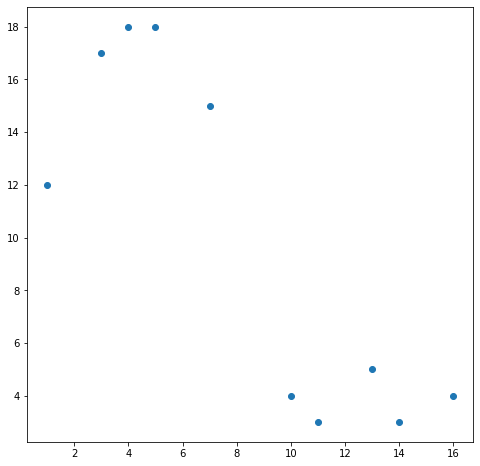

In [12]:
#VISUALISASI

plt.figure(1 , figsize = (8 , 8) )
plt.scatter(x = df.iloc[:,0] ,y = df.iloc[:,1])

In [13]:
# MENCARI INERTIA TERBAIK

inertia  = []
for n in range(1,10):
    algorithm = KMeans(n_clusters = n)
    algorithm.fit(df)
    inertia.append(algorithm.inertia_)

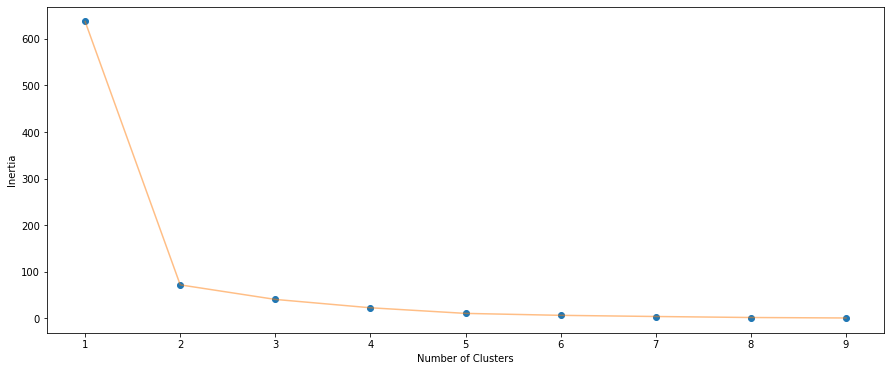

In [14]:
# VISUALISASI INERTIA
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [18]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeansParallel(scaled_data, k_range):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k_range: list of integers
        k range for applying KMeans
    Returns 
    -------
    best_k: int
        chosen value of k out of the given k range.
        chosen k is k with the minimum scaled inertia value.
    results: pandas DataFrame
        adjusted inertia value for each k in k_range
    '''
    
    ans = Parallel(n_jobs=-1,verbose=10)(delayed(kMeansRes)(scaled_data, k) for k in k_range)
    ans = list(zip(k_range,ans))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.3s remaining:    0.0s
[P

([<matplotlib.axis.XTick at 0x7f7ab8d4cad0>,
 <a list of 9 Text major ticklabel objects>)

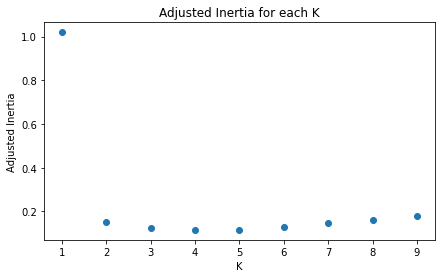

In [19]:
# create data matrix
data_matrix = np.matrix(df).astype(float)
# scale the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_data = mms.fit_transform(data_matrix)

# choose k range
k_range=range(1,10)
# compute adjusted intertia
best_k, results = chooseBestKforKMeansParallel(scaled_data, k_range)

# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(1,10,1))

In [26]:
#PELATIHAN KMEANS
algorithm = KMeans(n_clusters = 3)
algorithm.fit(df)

KMeans(n_clusters=3)

In [27]:
#LABEL DAN CENTROID
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


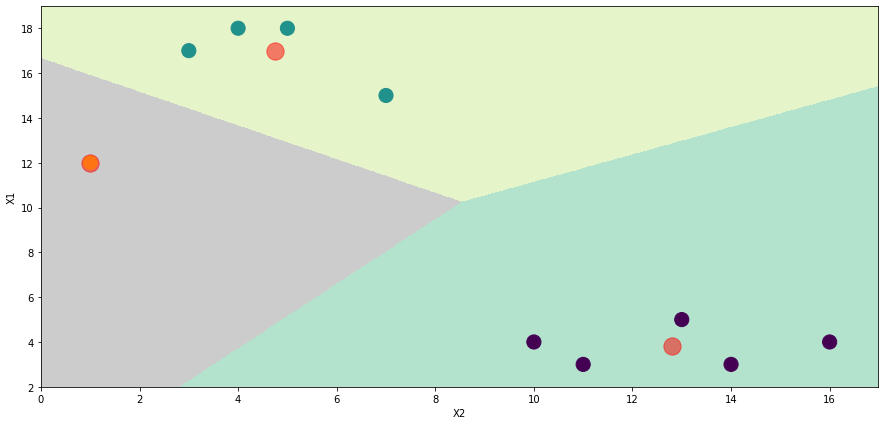

In [28]:
#EVALUASI KMEANS DENGAN GRAFIK
h = 0.02
x_min, x_max = df.iloc[:,0].min() - 1, df.iloc[:,0].max() + 1
y_min, y_max = df.iloc[:, 1].min() - 1, df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = df.iloc[:,0] ,y = df.iloc[:,1], c = labels, s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('X1') , plt.xlabel('X2')
plt.show()